PPM (92, 112) L


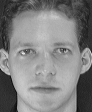

In [1]:
# Loading and displaying an image
from PIL import Image
img = Image.open('/home/dvveera/db/orl/s1/1.pgm')
print(img.format, img.size, img.mode)
display(img)

In [2]:
# Creating training, validation and test datasets
import os
import shutil

def copy_data(dir_s, fname):
    os.chdir(dir_s + '/' + fname)
    dir_train = dir_s + '/train/' + fname
    dir_valid = dir_s + '/valid/' + fname
    dir_test = dir_s + '/test/' + fname
    if not os.path.exists(dir_train):
        os.makedirs(dir_train)
    if not os.path.exists(dir_valid):
        os.makedirs(dir_valid)
    if not os.path.exists(dir_test):
        os.makedirs(dir_test)
    i = 1
    for filename in os.listdir(dir_s + '/' + fname):
        if i <= 6:
            shutil.copy(dir_s + '/' + fname + '/' + str(i) + '.pgm', dir_train)
        elif i <= 8:
            shutil.copy(dir_s + '/' + fname + '/' + str(i) + '.pgm', dir_valid)
        else:
            shutil.copy(dir_s + '/' + fname + '/' + str(i) + '.pgm', dir_test)
        i = i + 1

dir_src = '/home/dvveera/db/orl'
os.chdir(dir_src)
for filename in os.listdir(dir_src):
    if filename.startswith('s'):
        copy_data(dir_src, filename)
print('Separated Training, Validation and Test Data')

Separated Training, Validation and Test Data


In [3]:
# Assign Labels
def assign_addr_label(path):
    dirs = os.listdir(path)
    addrs = []
    labels = []
    for d in dirs:
        os.chdir(path + '/' + d)
        addr = glob.glob(path + '/' + d + '/' + '*')
        label = [d for i in range(len(addr))]
        addrs.extend(addr)
        labels.extend(label)
    return list(zip(addrs, labels))

import glob
train_path = '/home/dvveera/db/orl/train'
train_data = assign_addr_label(train_path)
train_addrs, train_labels = zip(*train_data)
valid_path = '/home/dvveera/db/orl/valid'
valid_data = assign_addr_label(valid_path)
valid_addrs, valid_labels = zip(*valid_data)
test_path = '/home/dvveera/db/orl/test'
test_data = assign_addr_label(test_path)
test_addrs, test_labels = zip(*test_data)
print('Assigned Labels to Training, Validation and Test Data')

Assigned Labels to Training, Validation and Test Data


In [4]:
# Load images and save them
import numpy as np
train_storage = []
valid_storage = []
test_storage = []
mean_storage = []
# Training Images
for i in range(len(train_addrs)):
    if i % 20 == 0 and i > 1:
        print('Train data: {}/{}'.format(i, len(train_addrs)))
    addr = train_addrs[i]
    img = Image.open(addr)
    img = np.array(img)
    train_storage.append(img)
    # print(np.array(img))
    mean_storage.append(np.sum(img) / float(len(train_labels)))
# print(train_storage)
# Validation Images
for i in range(len(valid_addrs)):
    if i % 20 == 0 and i > 1:
        print('Valid data: {}/{}'.format(i, len(valid_addrs)))
    addr = valid_addrs[i]
    img = Image.open(addr)
    img = np.array(img)
    valid_storage.append(img)
    # print(np.array(img))
# print(valid_storage)
# Test Images
for i in range(len(test_addrs)):
    if i % 20 == 0 and i > 1:
        print('Test data: {}/{}'.format(i, len(test_addrs)))
    addr = test_addrs[i]
    img = Image.open(addr)
    img = np.array(img)
    test_storage.append(img)
    # print(np.array(img))
# print(test_storage)

Train data: 20/240
Train data: 40/240
Train data: 60/240
Train data: 80/240
Train data: 100/240
Train data: 120/240
Train data: 140/240
Train data: 160/240
Train data: 180/240
Train data: 200/240
Train data: 220/240
Valid data: 20/80
Valid data: 40/80
Valid data: 60/80
Test data: 20/80
Test data: 40/80
Test data: 60/80


In [5]:
# Combine data and labels
train_set = list(zip(train_storage, train_labels))
valid_set = list(zip(valid_storage, valid_labels))
test_set = list(zip(test_storage, test_labels))

In [6]:
# Linear Discriminant Analysis
from collections import Counter
# Converting images to a one-dimensional vector
train_1d = [t.flatten() for t in train_storage]
# Calculate the mean of images in each class
label_dict = Counter(train_labels)
mean = {}
for idx, t in enumerate(train_1d):
    lab = train_labels[idx]
    if lab not in mean:
        mean[lab] = t / label_dict[lab]
    else:
        mean[lab] = (mean[lab] + t) / label_dict[lab]
print('Calculated the means of the images in each class')
# print(mean)

Calculated the means of the images in each class


In [7]:
# Calculate in class scatter matrix
S = {}
for idx, t in enumerate(train_1d):
    lab = train_labels[idx]
    if lab not in S:
        S[lab] = np.dot(np.transpose(t - mean[lab]), (t - mean[lab]))
    else:
        S[lab] += np.dot(np.transpose(t - mean[lab]), (t - mean[lab]))
print('Calculated the in class scatter matrix for each class')
print(S)

Calculated the in class scatter matrix for each class
{'s29': 388245548.9160105, 's2': 598425111.04867947, 's14': 583553195.49854887, 's21': 450803834.58220744, 's26': 685168759.21971214, 's17': 624832040.10032117, 's5': 714126483.07587993, 's27': 681754118.80448294, 's23': 583715490.14426565, 's40': 677241502.54167747, 's35': 648887292.50979185, 's8': 709957514.64610791, 's24': 526439369.17805511, 's12': 695101757.29735315, 's6': 791895644.56694305, 's3': 619378196.76219952, 's15': 580710908.16919971, 's16': 683861467.50671077, 's39': 325505184.16210073, 's28': 616985876.0420922, 's1': 874438268.96342409, 's10': 552610063.33652306, 's11': 583796877.24898362, 's7': 606679142.56480002, 's36': 621123519.72187352, 's33': 402072065.9660275, 's32': 760535141.72642589, 's34': 463957827.02609497, 's4': 657534134.14190555, 's9': 591915408.33705008, 's25': 695449938.60140038, 's22': 344969931.25670362, 's37': 579431096.86007905, 's18': 801200167.01752949, 's31': 549512727.98001814, 's19': 70725

In [8]:
S = {}
P = {}
lab = 's29'
S[lab] = np.matmul((train_1d[0] - mean[lab]), np.transpose(train_1d[0] - mean[lab]))
tr = np.transpose()
print(np.transpose(), (train_1d[0] - mean[lab]), S)
P[lab] = np.dot((train_1d[0] - mean[lab]), (train_1d[0] - mean[lab]))
print(train_1d[0], mean[lab], P)
# # Create data matrix
# data_matrix = np.transpose(train_center)
# # print(np.transpose(train_center))
# # Create covariance matrix
# covariance = np.dot(data_matrix, np.transpose(data_matrix))
# # Check for symmetricity
# if(covariance.all() == np.transpose(covariance).all()):
#     print('Symmetric')

[ 80.34171382  79.14471879  78.05304784 ...,  33.88873885  36.93098422
  37.10562414] [ 80.34171382  79.14471879  78.05304784 ...,  33.88873885  36.93098422
  37.10562414] {'s29': 54512997.831187785}
[101 100  99 ...,  49  52  52] [ 20.65828618  20.85528121  20.94695216 ...,  15.11126115  15.06901578
  14.89437586] {'s29': 54512997.831187785}
